In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk          # Library used for nlp processing

In [2]:
messages = pd.read_csv("spam.csv", encoding = "cp1252")

In [3]:
messages.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
messages.shape

(6776, 5)

In [5]:
# Problem Statement
 # Built a predective model which can classify email weather the  spam or ham

In [6]:
messages.v1.value_counts()

ham     5854
spam     922
Name: v1, dtype: int64

In [7]:
messages = messages.iloc[ : , [0,1]]  # deleting the unnamed last 3 columns which is not required
messages.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [8]:
messages.rename(columns={"v1":"label", "v2":"message"}, inplace = True)

In [9]:
messages.head(2)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
messages.label.replace({"ham" : 0, "spam":1}, inplace = True) # chage thelabelling of ham and spam

In [11]:
messages.message  = messages.message.str.lower()  
# Converting all document into lowercase because pyhon is case sensitive
# because of that it read two same words different if they have in different cases 
# for example = like CAR car


In [12]:
from nltk.corpus import stopwords 

In [13]:
# at the first time importing we get error if we are not imported the stopwords 
# error like Stopwords doesnot exist 
# for that we need to download  the stopword

nltk.download("stopwords")   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
len(stopwords.words("english")) # 179 Stopwords

179

In [16]:
import string
string.punctuation  # Shows punctuation

# Why importing? Later on in the document we willremove this punctuations 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def text_process(mess):            ### # Creating a user defined function def = user defined fun, Fun name = text_process, mess = argument
    """                                                        ## It is a doc string
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [18]:
messages["message"].apply(text_process) # now there is no puncutation & stopwords in dataframe messages  has been removed 

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer will be use to count each and every word


In [20]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages["message"])

In [21]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [22]:
len(bow_transformer.vocabulary_)
# This 9422 is no of unique words

9422

In [23]:
messages_bow = bow_transformer.transform(messages.message) #creating dump document metrics

In [24]:
messages_bow.shape  # messsag_bow is a term document matrix (TDM) 
# here each unique word has  become a column in data frame
# this type of representation known as a term document matrix
# use this matrix for building model and do prediction 

(6776, 9422)

In [25]:
type(messages_bow) # its show spars matrix because zeros is more in matrix in tdf

scipy.sparse.csr.csr_matrix

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(messages_bow, messages.label, test_size = 0.2)

In [28]:
x_train.shape

(5420, 9422)

In [29]:
y_train.shape

(5420,)

In [30]:
x_test.shape

(1356, 9422)

In [31]:
y_test.shape

(1356,)

In [32]:
# Build the model And predict the model

In [33]:
from sklearn.naive_bayes import MultinomialNB

naive_bay = MultinomialNB()

In [34]:
spam_nb_model = naive_bay.fit(x_train, y_train)

In [35]:
spam_nb_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
pred_value = spam_nb_model.predict(x_test)

In [37]:
pred_value

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
table = confusion_matrix(pred_value, y_test) # y_test because we are doing prediction on test data

In [40]:
table   # best thing in this confusion matrix is we are getting good accuracy for both classes ham and spam

array([[1158,    5],
       [  20,  173]], dtype=int64)

In [41]:
accuracy = table.diagonal().sum()/table.sum() * 100
accuracy                                

98.15634218289085

In [42]:
1158/(1158+14)# accuracy for the ham class

0.9880546075085325

In [43]:
180/(180+4) #accuracy for the spam class

0.9782608695652174

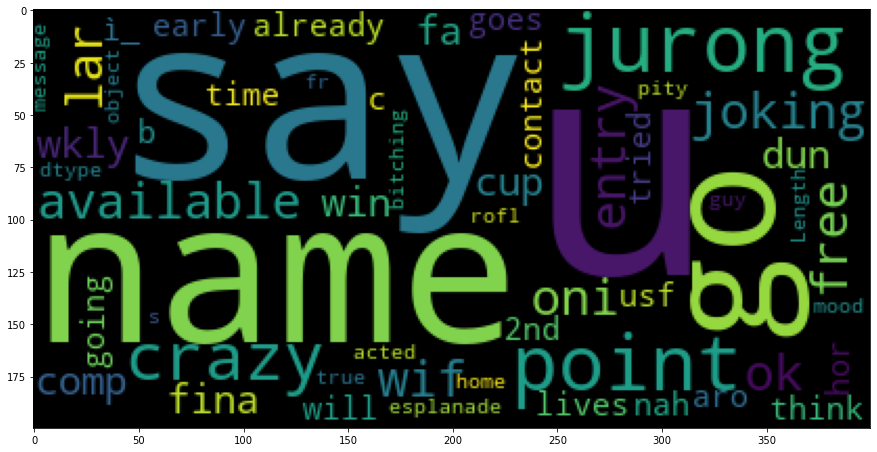

In [44]:
from wordcloud import WordCloud
WordCloud
cloud = WordCloud().generate(str(messages["message"]))
fig = plt.figure(figsize=(15,15))
plt.imshow(cloud)

# WordCloud it represent the most frequent word

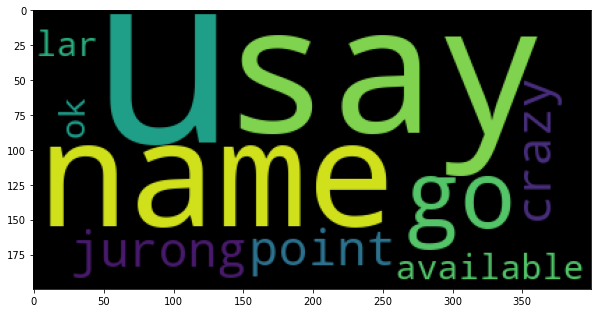

In [45]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 10).generate(str(messages['message']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud) 
